In [1]:
import sys
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

import os,sys
#os.getcwd()
# help(os.chdir)
#os.chdir(r"")
#os.getcwd()

In [2]:
mat= pd.read_csv("./pbmc_nmf_filt.csv",index_col=0).T

In [3]:
mat

,ISG15,CPSF3L,MRPL20,ATAD3C,C1orf86,RER1,RP3-395M20.9,LRRC47,GPR153,TNFRSF25,TNFRSF9,CTNNBIP1,RBP7,SRM,UBIAD1,DRAXIN,PRDM2,RP3-467K16.4,EFHD2,DDI2,SPEN,SDHB,CAMK2N1,CDA,PINK1,HP1BP3,C1QA,C1QC,C1QB,MDS2,PITHD1,HMGCL,C1orf63,TMEM50A,LDLRAP1,RP11-70P17.1,STMN1,PDIK1L,ZNF593,SH3BGRL3,...,ADSL,PHF5A,DESI1,CTA-250D10.23,PACSIN2,BIK,SAMM50,LDOC1L,PRR5,CTA-217C2.1,KIAA0930,UPK3A,ATXN10,TTC38,CTA-29F11.1,CRELD2,LMF2,TYMP,SAMSN1,USP25,MAP3K7CL,MIS18A,IFNGR2,ATP5O,TTC3,DSCR9,DSCR3,BRWD1,BACE2,MX2,MX1,AP001046.6,SIK1,C21orf33,ICOSLG,SUMO3,SLC19A1,S100B,MT-CO2,MT-ND6
AAACATACAACCAC-1,0.000000,0.000000,1.802487,0.0,0.0,0.000000,0.0,0.000000,0.0,5.004436,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,2.046639,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,2.549955,0.0,2.184702,0.000000,0.0,0.0,0.0,0.0,0.000000,0.864381,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,3.752976,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,2.696566,0.0,0.0000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,1.188205,0.0
AAACATTGAGCTAC-1,0.000000,0.000000,0.000000,0.0,0.0,1.328302,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,3.998846,1.356138,0.0,0.000000,0.0,1.846117,0.0,0.0,0.0,0.0,0.000000,0.0,1.484691,0.000000,0.0,0.0,0.0,0.0,0.000000,0.937818,...,0.0,1.661410,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,1.830108,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.858375,0.000000,0.0,0.0000,2.814666,0.0,0.0,0.000000,0.0,0.0,1.956422,0.0,0.000000,0.0,0.0,1.488457,0.0
AAACATTGATCAGC-1,0.942034,0.000000,1.575363,0.0,0.0,1.708290,0.0,3.945237,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,2.127102,0.0,0.0,0.0,0.0,0.000000,1.164262,...,0.0,2.136690,0.000000,0.0,0.0,0.0,0.0,0.0,3.280080,0.0,0.0,0.0,0.000000,0.0,0.0,2.763888,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.632980,0.0
AAACCGTGCTTCCG-1,2.344511,0.000000,0.000000,0.0,0.0,1.871554,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,1.959705,0.0,0.000000,0.000000,0.0,3.391482,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,1.490296,...,0.0,0.000000,3.690113,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,1.720177,0.0,0.0,0.0,0.0,3.055037,1.209435,0.000000,0.0,0.0000,0.000000,0.0,0.0,1.816332,0.0,0.0,2.756565,0.0,1.921484,0.0,0.0,1.051606,0.0
AAACCGTGTATGCG-1,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,5.726589,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,2.575739,0.0,0.0,0.0,0.0,0.000000,1.340717,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTCGAACTCTCAT-1,2.454386,2.844189,1.497049,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,1.814496,1.448333,0.0,0.0,0.0,0.0,0.000000,1.541605,...,0.0,2.030471,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,2.089941,0.0,0.0,0.0,0.0,1.931249,1.478046,0.000000,0.0,3.0637,0.000000,0.0,0.0,2.631455,0.0,0.0,0.000000,0.0,1.666676,0.0,0.0,0.802825,0.0
TTTCTACTGAGGCA-1,0.897475,2.851405,0.000000,0.0,0.0,1.627

In [4]:
celltype=pd.read_csv("./celltype2.csv",index_col=0)
celltype

,x
1,Memory CD4 T
2,B
3,Memory CD4 T
4,CD14+ Mono
5,NK
...,...
2634,CD14+ Mono
2635,B
2636,B
2637,B


In [5]:
celltype["x"].value_counts()

Naive CD4 T     711
CD14+ Mono      480
Memory CD4 T    472
B               344
CD8 T           279
FCGR3A+ Mono    162
NK              144
DC               32
Platelet         14
Name: x, dtype: int64

In [6]:
celltype[celltype["x"].isin(["Memory CD4 T","Naive CD4 T"])]="CD4 T"

In [7]:
celltype["x"].value_counts()

CD4 T           1183
CD14+ Mono       480
B                344
CD8 T            279
FCGR3A+ Mono     162
NK               144
DC                32
Platelet          14
Name: x, dtype: int64

In [8]:
#help(plt.title)

Text(0, 0.5, 'umap2')

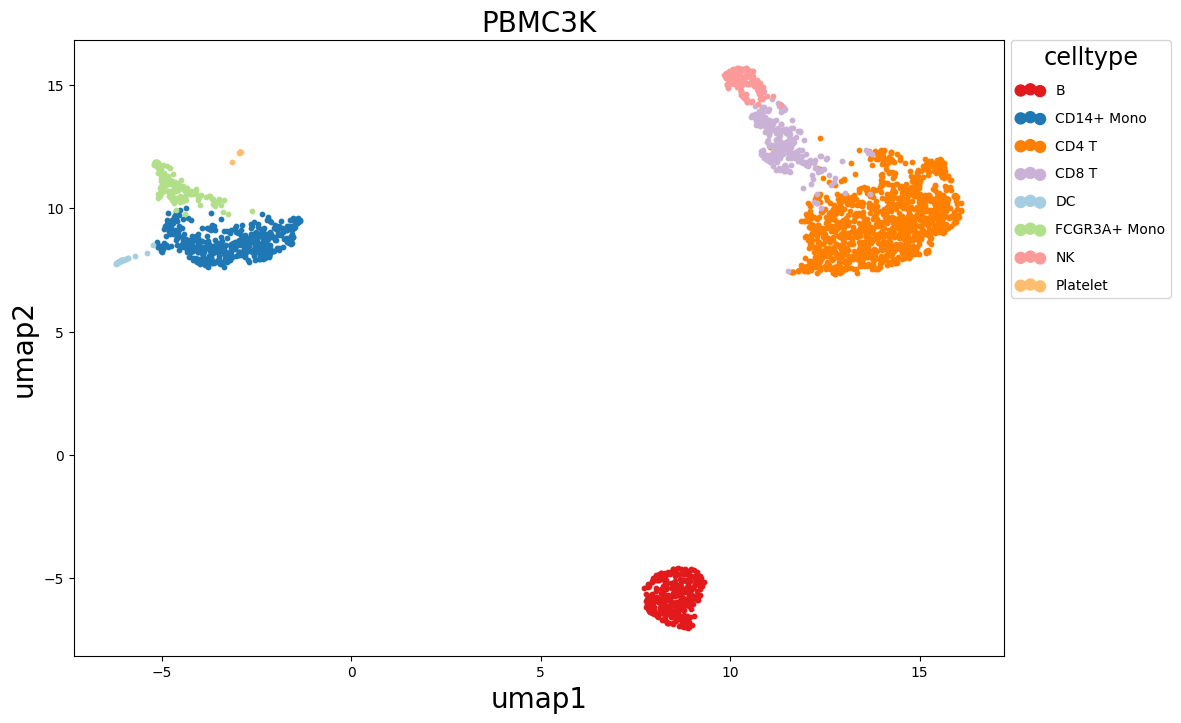

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
umap_embedding=pd.read_csv("./singlecell-NMF_hvg2000_umap.csv",index_col=0)
umap_data=umap_embedding.values
plt.figure(figsize=(12,8))
plt.title('PBMC3K' ,fontsize=20)
#celltype2=pd.read_csv("./celltype2.csv",index_col=0)
target_names=list(celltype["x"].astype('category').cat.categories)
target=celltype["x"].astype('category').values.codes
#colors=['#800000','#FF0000','#C71585','#FF00FF','#FFC0CB','#4B0082','#8B008B','#6A5ACD','#8B4513']#,'#FF8C00','#FF6347','#20B2AA']
colors=['#E31A1C','#1F78B4','#FF7F00','#CAB2D6','#A6CEE3','#B2DF8A','#FB9A99','#FDBF6F','#33A02C',]
for color,i,target_name in zip(colors,np.arange(9),target_names):
    plt.scatter(umap_data[target==i,0], umap_data[target==i,1],color=color, s=10,label=target_name)
#plt.legend(loc='best',scatterpoints=1,fontsize='medium')#,scatteryoffsets=1
plt.legend(loc='best',scatterpoints=3,labelspacing=1,markerscale=2.5,fontsize='medium',bbox_to_anchor=(1.18,1.0),borderaxespad=0.,title='celltype',title_fontsize='xx-large')#,scatteryoffsets=1
plt.xlabel("umap1",fontsize=20)
plt.ylabel("umap2",fontsize=20)

In [10]:
mat2= pd.read_csv("./pbmc_nmf_filt_T_all.csv",index_col=0)
mat2

,AL627309.1,AP006222.2,RP11-206L10.2,RP11-206L10.9,LINC00115,NOC2L,KLHL17,PLEKHN1,RP11-54O7.17,HES4,RP11-54O7.11,ISG15,AGRN,C1orf159,TNFRSF18,TNFRSF4,SDF4,B3GALT6,FAM132A,UBE2J2,ACAP3,PUSL1,CPSF3L,GLTPD1,DVL1,MXRA8,AURKAIP1,CCNL2,RP4-758J18.2,MRPL20,ATAD3C,ATAD3B,ATAD3A,SSU72,AL645728.1,C1orf233,RP11-345P4.9,MIB2,MMP23B,CDK11B,...,ITGB2,ITGB2-AS1,LL21NC02-1C16.2,FAM207A,ADARB1,POFUT2,COL18A1,SLC19A1,PCBP3,COL6A1,COL6A2,SPATC1L,LSS,MCM3AP-AS1,MCM3AP,AP001469.9,YBEY,C21orf58,PCNT,DIP2A,S100B,PRMT2,MT-ND1,MT-ND2,MT-CO1,MT-CO2,MT-ATP8,MT-ATP6,MT-CO3,MT-ND3,MT-ND4L,MT-ND4,MT-ND5,MT-ND6,MT-CYB,AC145212.1,AL592183.1,AL354822.1,PNRC2.1,SRSF10.1
AAACATACAACCAC-1,0,0,0,0,0.0,0.0,0.0,0,0,0.0,0,0.000000,0,0.0,0.00000,0.0,0.000000,0.000000,0,0.0,0.0,0.0,0.000000,0.0,0,0,0.000000,0.000000,0.0,1.802487,0.0,0.0,0.0,0.000000,0.0,0,0.0,0.000000,0.0,0.0,...,0.000000,0.000000,0,0.000000,0.000000,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,0.000000,0,0.0,0.0,0.0,0.000000,1.215960,0.963258,1.159909,1.188205,0.0,1.499719,0.932202,2.021522,0.000000,1.259619,1.133804,0.0,1.024205,0.0,0.000000,0,0.0,0.0
AAACATTGAGCTAC-1,0,0,0,0,0.0,0.0,0.0,0,0,0.0,0,0.000000,0,0.0,4.96775,0.0,0.000000,0.000000,0,0.0,0.0,0.0,0.000000,0.0,0,0,1.145123,0.000000,0.0,0.000000,0.0,0.0,0.0,1.044137,0.0,0,0.0,3.598616,0.0,0.0,...,1.138701,2.027360,0,0.000000,0.000000,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,2.687513,0,0.0,0.0,0.0,0.000000,0.982725,1.136877,1.125038,1.488457,0.0,1.493801,1.046469,2.008260,0.000000,1.420455,0.770516,0.0,1.019707,0.0,1.800763,0,0.0,0.0
AAACATTGATCAGC-1,0,0,0,0,0.0,0.0,0.0,0,0,0.0,0,0.942034,0,0.0,0.00000,0.0,2.337038,0.000000,0,0.0,0.0,0.0,0.000000,0.0,0,0,0.000000,0.000000,0.0,1.575363,0.0,0.0,0.0,0.000000,0.0,0,0.0,0.000000,0.0,0.0,...,0.000000,0.000000,0,0.000000,0.000000,0.0,0.0,0.0,10,0,0.0,0.0,0.0,0.0,0.0,0,0.000000,0,0.0,0.0,0.0,1.669785,0.902258,0.740582,0.785134,0.632980,0.0,0.000000,0.793474,0.000000,0.000000,0.791778,1.382999,0.0,0.936212,0.0,0.000000,0,0.0,0.0
AAACCGTGCTTCCG-1,0,0,0,0,0.0,0.0,0.0,0,0,0.0,0,2.344511,0,0.0,0.00000,0.0,0.000000,0.000000,0,0.0,0.0,0.0,0.000000,0.0,0,0,1.613458,0.000000,0.0,0.000000,0.0,0.0,0.0,2.362221,0.0,0,0.0,0.000000,0.0,0.0,...,1.097534,2.856514,0,0.000000,0.000000,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,0.000000,0,0.0,0.0,0.0,0.000000,1.031452,1.110848,0.958038,1.051606,0.0,1.380933,0.843239,0.000000,2.366133,0.845787,1.489636,0.0,0.768545,0.0,0.000000,0,0.0,0.0
AAACCGTGTATGCG-1,0,0,0,0,0.0,0.0,0.0,0,0,0.0,0,0.000000,0,0.0,0.00000,0.0,0.000000,0.000000,0,0.0,0.0,0.0,0.000000,0.0,0,0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0,0.0,0.000000,0.0,0.0,...,2.146719,0.000000,0,0.000000,0.000000,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,0.000000,0,0.0,0.0,0.0,0.000000,0.832685,0.000000,1.068784,0.000000,0.0,0.000000,0.732289,0.000000,0.000000,0.000000,2.123464,0.0,0.864021,0.0,0.000000,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTCGAACTCTCAT-1,0,0,0,0,0.0,0.0,0.0,0,0,0.0,0,2.454386,0,0.0,0.00000,0.0,0.000000,5.336135,0,0.0,0.0,0.0,2.844189,0.0,0,0,1.399497,0.000000,0.0,1.497049,0.0,0.0,0.0,1.276079,0.0,0,0.0,0.000000,0.0,0.0,...,0.951990,0.000000,0,0.000000,7.899092,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,0.000000,0,0.0,0.0,0.0,0.000000,1.656728,0.000000,0.962215,0.802825,0.0,0.000000,0.964770,1.678968,0.000000,0.456896,0.000000,0.0,0.485837,0.0,0.000000,0,0.0,0.0
TTTCTACTGAGGCA-1,0,0,0,0,0.0,0.0,0.0,0,0,0.0,0,0.897475,0,0.0,0.00000,0.0,0.000000,0.000000,0,0.0,0.0,0.0,2.851405,0.0,0,0,1.975873,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0,0.0,0.000000,0.0,0.0,...,0.000000,0.000000,0,3.100517,0.000000,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,0.000000,10,0.0,0.0,0.0,0.000000,0.783482,0.000000,0.912739,0.432086,0.0,0.00000

In [11]:
df=mat2.copy()

In [12]:
celltype2=pd.read_csv("./celltype2.csv",index_col=0)

In [13]:
celltype2["x"].values

array(['Memory CD4 T', 'B', 'Memory CD4 T', ..., 'B', 'B', 'Naive CD4 T'],
      dtype=object)

In [14]:
df['celltype']=celltype2["x"].values

In [15]:
df

,AL627309.1,AP006222.2,RP11-206L10.2,RP11-206L10.9,LINC00115,NOC2L,KLHL17,PLEKHN1,RP11-54O7.17,HES4,RP11-54O7.11,ISG15,AGRN,C1orf159,TNFRSF18,TNFRSF4,SDF4,B3GALT6,FAM132A,UBE2J2,ACAP3,PUSL1,CPSF3L,GLTPD1,DVL1,MXRA8,AURKAIP1,CCNL2,RP4-758J18.2,MRPL20,ATAD3C,ATAD3B,ATAD3A,SSU72,AL645728.1,C1orf233,RP11-345P4.9,MIB2,MMP23B,CDK11B,...,ITGB2-AS1,LL21NC02-1C16.2,FAM207A,ADARB1,POFUT2,COL18A1,SLC19A1,PCBP3,COL6A1,COL6A2,SPATC1L,LSS,MCM3AP-AS1,MCM3AP,AP001469.9,YBEY,C21orf58,PCNT,DIP2A,S100B,PRMT2,MT-ND1,MT-ND2,MT-CO1,MT-CO2,MT-ATP8,MT-ATP6,MT-CO3,MT-ND3,MT-ND4L,MT-ND4,MT-ND5,MT-ND6,MT-CYB,AC145212.1,AL592183.1,AL354822.1,PNRC2.1,SRSF10.1,celltype
AAACATACAACCAC-1,0,0,0,0,0.0,0.0,0.0,0,0,0.0,0,0.000000,0,0.0,0.00000,0.0,0.000000,0.000000,0,0.0,0.0,0.0,0.000000,0.0,0,0,0.000000,0.000000,0.0,1.802487,0.0,0.0,0.0,0.000000,0.0,0,0.0,0.000000,0.0,0.0,...,0.000000,0,0.000000,0.000000,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,0.000000,0,0.0,0.0,0.0,0.000000,1.215960,0.963258,1.159909,1.188205,0.0,1.499719,0.932202,2.021522,0.000000,1.259619,1.133804,0.0,1.024205,0.0,0.000000,0,0.0,0.0,Memory CD4 T
AAACATTGAGCTAC-1,0,0,0,0,0.0,0.0,0.0,0,0,0.0,0,0.000000,0,0.0,4.96775,0.0,0.000000,0.000000,0,0.0,0.0,0.0,0.000000,0.0,0,0,1.145123,0.000000,0.0,0.000000,0.0,0.0,0.0,1.044137,0.0,0,0.0,3.598616,0.0,0.0,...,2.027360,0,0.000000,0.000000,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,2.687513,0,0.0,0.0,0.0,0.000000,0.982725,1.136877,1.125038,1.488457,0.0,1.493801,1.046469,2.008260,0.000000,1.420455,0.770516,0.0,1.019707,0.0,1.800763,0,0.0,0.0,B
AAACATTGATCAGC-1,0,0,0,0,0.0,0.0,0.0,0,0,0.0,0,0.942034,0,0.0,0.00000,0.0,2.337038,0.000000,0,0.0,0.0,0.0,0.000000,0.0,0,0,0.000000,0.000000,0.0,1.575363,0.0,0.0,0.0,0.000000,0.0,0,0.0,0.000000,0.0,0.0,...,0.000000,0,0.000000,0.000000,0.0,0.0,0.0,10,0,0.0,0.0,0.0,0.0,0.0,0,0.000000,0,0.0,0.0,0.0,1.669785,0.902258,0.740582,0.785134,0.632980,0.0,0.000000,0.793474,0.000000,0.000000,0.791778,1.382999,0.0,0.936212,0.0,0.000000,0,0.0,0.0,Memory CD4 T
AAACCGTGCTTCCG-1,0,0,0,0,0.0,0.0,0.0,0,0,0.0,0,2.344511,0,0.0,0.00000,0.0,0.000000,0.000000,0,0.0,0.0,0.0,0.000000,0.0,0,0,1.613458,0.000000,0.0,0.000000,0.0,0.0,0.0,2.362221,0.0,0,0.0,0.000000,0.0,0.0,...,2.856514,0,0.000000,0.000000,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,0.000000,0,0.0,0.0,0.0,0.000000,1.031452,1.110848,0.958038,1.051606,0.0,1.380933,0.843239,0.000000,2.366133,0.845787,1.489636,0.0,0.768545,0.0,0.000000,0,0.0,0.0,CD14+ Mono
AAACCGTGTATGCG-1,0,0,0,0,0.0,0.0,0.0,0,0,0.0,0,0.000000,0,0.0,0.00000,0.0,0.000000,0.000000,0,0.0,0.0,0.0,0.000000,0.0,0,0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0,0.0,0.000000,0.0,0.0,...,0.000000,0,0.000000,0.000000,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,0.000000,0,0.0,0.0,0.0,0.000000,0.832685,0.000000,1.068784,0.000000,0.0,0.000000,0.732289,0.000000,0.000000,0.000000,2.123464,0.0,0.864021,0.0,0.000000,0,0.0,0.0,NK
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTCGAACTCTCAT-1,0,0,0,0,0.0,0.0,0.0,0,0,0.0,0,2.454386,0,0.0,0.00000,0.0,0.000000,5.336135,0,0.0,0.0,0.0,2.844189,0.0,0,0,1.399497,0.000000,0.0,1.497049,0.0,0.0,0.0,1.276079,0.0,0,0.0,0.000000,0.0,0.0,...,0.000000,0,0.000000,7.899092,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,0.000000,0,0.0,0.0,0.0,0.000000,1.656728,0.000000,0.962215,0.802825,0.0,0.000000,0.964770,1.678968,0.000000,0.456896,0.000000,0.0,0.485837,0.0,0.000000,0,0.0,0.0,CD14+ Mono
TTTCTACTGAGGCA-1,0,0,0,0,0.0,0.0,0.0,0,0,0.0,0,0.897475,0,0.0,0.00000,0.0,0.000000,0.000000,0,0.0,0.0,0.0,2.851405,0.0,0,0,1.975873,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0,0.0,0.000000,0.0,0.0,...,0.000000,0,3.100517,0.000000,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,0.000000,10,0.0,0.0,0.0,0.000000,0.783482,0.000000,0.912739,0.432086,0.0,0.000000,0.927

In [16]:
df_cd4t=df[df["celltype"].isin(["Memory CD4 T","Naive CD4 T"])]

In [17]:
df_cd4t

,AL627309.1,AP006222.2,RP11-206L10.2,RP11-206L10.9,LINC00115,NOC2L,KLHL17,PLEKHN1,RP11-54O7.17,HES4,RP11-54O7.11,ISG15,AGRN,C1orf159,TNFRSF18,TNFRSF4,SDF4,B3GALT6,FAM132A,UBE2J2,ACAP3,PUSL1,CPSF3L,GLTPD1,DVL1,MXRA8,AURKAIP1,CCNL2,RP4-758J18.2,MRPL20,ATAD3C,ATAD3B,ATAD3A,SSU72,AL645728.1,C1orf233,RP11-345P4.9,MIB2,MMP23B,CDK11B,...,ITGB2-AS1,LL21NC02-1C16.2,FAM207A,ADARB1,POFUT2,COL18A1,SLC19A1,PCBP3,COL6A1,COL6A2,SPATC1L,LSS,MCM3AP-AS1,MCM3AP,AP001469.9,YBEY,C21orf58,PCNT,DIP2A,S100B,PRMT2,MT-ND1,MT-ND2,MT-CO1,MT-CO2,MT-ATP8,MT-ATP6,MT-CO3,MT-ND3,MT-ND4L,MT-ND4,MT-ND5,MT-ND6,MT-CYB,AC145212.1,AL592183.1,AL354822.1,PNRC2.1,SRSF10.1,celltype
AAACATACAACCAC-1,0,0,0,0,0.0,0.000000,0.0,0,0,0.0,0,0.000000,0,0.000000,0.0,0.000000,0.000000,0.0,0,0.000000,0.0,0.0,0.000000,0.0,0,0,0.000000,0.0,0.0,1.802487,0.0,0.0,0.0,0.000000,0.0,0,0.0,0.0,0.0,0.0,...,0.000000,0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0.0,0.0,0.000000,0.000000,1.215960,0.963258,1.159909,1.188205,0.0,1.499719,0.932202,2.021522,0.000000,1.259619,1.133804,0.000000,1.024205,0.0,0.000000,0,0.0,0.000000,Memory CD4 T
AAACATTGATCAGC-1,0,0,0,0,0.0,0.000000,0.0,0,0,0.0,0,0.942034,0,0.000000,0.0,0.000000,2.337038,0.0,0,0.000000,0.0,0.0,0.000000,0.0,0,0,0.000000,0.0,0.0,1.575363,0.0,0.0,0.0,0.000000,0.0,0,0.0,0.0,0.0,0.0,...,0.000000,0,0.0,0.0,0.0,0.0,0.0,10,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0.0,0.0,0.000000,1.669785,0.902258,0.740582,0.785134,0.632980,0.0,0.000000,0.793474,0.000000,0.000000,0.791778,1.382999,0.000000,0.936212,0.0,0.000000,0,0.0,0.000000,Memory CD4 T
AAACGCACTGGTAC-1,0,0,0,0,0.0,0.000000,0.0,0,0,0.0,0,1.137827,0,0.000000,0.0,0.000000,0.000000,0.0,0,0.000000,0.0,0.0,0.000000,0.0,0,0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0,0.0,0.0,0.0,0.0,...,0.000000,0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0.0,0.0,0.000000,0.000000,1.023522,1.001830,1.119757,0.738141,0.0,0.796756,0.000000,0.000000,0.000000,0.998775,0.000000,0.000000,0.965232,0.0,0.000000,0,0.0,0.000000,Memory CD4 T
AAACGCTGTAGCCA-1,0,0,0,0,0.0,0.000000,0.0,0,0,0.0,0,0.000000,0,0.000000,0.0,4.973371,0.000000,0.0,0,3.848565,0.0,0.0,0.000000,0.0,0,0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0,0.0,0.0,0.0,0.0,...,3.974865,0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.867812,1.015054,0.0,0.000000,0.853003,3.954227,0.000000,0.946496,0.000000,0.000000,0.779404,0.0,0.000000,0,0.0,0.000000,Naive CD4 T
AAACTTGATCCAGA-1,0,0,0,0,0.0,3.109702,0.0,0,0,0.0,0,0.000000,0,0.000000,0.0,0.000000,0.000000,0.0,0,0.000000,0.0,0.0,0.000000,0.0,0,0,0.000000,0.0,0.0,0.000000,0.0,10.0,0.0,0.000000,0.0,0,0.0,0.0,0.0,0.0,...,0.000000,0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0.0,0.0,0.000000,0.000000,1.124449,0.611000,0.937940,0.522225,0.0,0.000000,0.871739,0.000000,2.486804,0.553612,0.000000,3.225857,0.588680,0.0,0.000000,0,0.0,0.000000,Naive CD4 T
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTGTAGCTAGCTCA-1,0,0,0,0,0.0,3.029891,0.0,0,0,0.0,0,1.443747,0,0.000000,0.0,3.659953,2.621907,0.0,0,0.000000,0.0,0.0,0.000000,0.0,0,0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0,0.0,0.0,0.0,0.0,...,0.000000,0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0.0,0.0,0.000000,1.873321,1.158165,0.949638,0.948353,1.232445,0.0,0.740061,1.092344,2.707768,2.422979,1.021649,1.773401,0.000000,0.783538,0.0,2.598201,0,0.0,0.000000,Memory CD4 T
TTTAGCTGATACCG-1,0,0,0,0,0.0,0.000000,0.0,0,0,0.0,0,0.000000,0,9.877257,0.0,0.000000,0.000000,0.0,0,0.000000,0.0,0.0,0.000000,0.0,0,0,0.000000,0.0,0.0,1.688905,0.0,0.0,0.0,0.000000,0.0,0,0.0,0.0,0.0,0.0,...,0.000000,0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0.0,0.0,5.191283,0.000000,0.853256,1.215129,1.060239,1.14809

In [61]:
df_cd4t.to_csv('cd4T_cell_matrix.csv')

In [18]:
df_cd4t.iloc[:,0:-1]

,AL627309.1,AP006222.2,RP11-206L10.2,RP11-206L10.9,LINC00115,NOC2L,KLHL17,PLEKHN1,RP11-54O7.17,HES4,RP11-54O7.11,ISG15,AGRN,C1orf159,TNFRSF18,TNFRSF4,SDF4,B3GALT6,FAM132A,UBE2J2,ACAP3,PUSL1,CPSF3L,GLTPD1,DVL1,MXRA8,AURKAIP1,CCNL2,RP4-758J18.2,MRPL20,ATAD3C,ATAD3B,ATAD3A,SSU72,AL645728.1,C1orf233,RP11-345P4.9,MIB2,MMP23B,CDK11B,...,ITGB2,ITGB2-AS1,LL21NC02-1C16.2,FAM207A,ADARB1,POFUT2,COL18A1,SLC19A1,PCBP3,COL6A1,COL6A2,SPATC1L,LSS,MCM3AP-AS1,MCM3AP,AP001469.9,YBEY,C21orf58,PCNT,DIP2A,S100B,PRMT2,MT-ND1,MT-ND2,MT-CO1,MT-CO2,MT-ATP8,MT-ATP6,MT-CO3,MT-ND3,MT-ND4L,MT-ND4,MT-ND5,MT-ND6,MT-CYB,AC145212.1,AL592183.1,AL354822.1,PNRC2.1,SRSF10.1
AAACATACAACCAC-1,0,0,0,0,0.0,0.000000,0.0,0,0,0.0,0,0.000000,0,0.000000,0.0,0.000000,0.000000,0.0,0,0.000000,0.0,0.0,0.000000,0.0,0,0,0.000000,0.0,0.0,1.802487,0.0,0.0,0.0,0.000000,0.0,0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0.0,0.0,0.000000,0.000000,1.215960,0.963258,1.159909,1.188205,0.0,1.499719,0.932202,2.021522,0.000000,1.259619,1.133804,0.000000,1.024205,0.0,0.000000,0,0.0,0.000000
AAACATTGATCAGC-1,0,0,0,0,0.0,0.000000,0.0,0,0,0.0,0,0.942034,0,0.000000,0.0,0.000000,2.337038,0.0,0,0.000000,0.0,0.0,0.000000,0.0,0,0,0.000000,0.0,0.0,1.575363,0.0,0.0,0.0,0.000000,0.0,0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0,0.0,0.0,0.0,0.0,0.0,10,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0.0,0.0,0.000000,1.669785,0.902258,0.740582,0.785134,0.632980,0.0,0.000000,0.793474,0.000000,0.000000,0.791778,1.382999,0.000000,0.936212,0.0,0.000000,0,0.0,0.000000
AAACGCACTGGTAC-1,0,0,0,0,0.0,0.000000,0.0,0,0,0.0,0,1.137827,0,0.000000,0.0,0.000000,0.000000,0.0,0,0.000000,0.0,0.0,0.000000,0.0,0,0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0.0,0.0,0.000000,0.000000,1.023522,1.001830,1.119757,0.738141,0.0,0.796756,0.000000,0.000000,0.000000,0.998775,0.000000,0.000000,0.965232,0.0,0.000000,0,0.0,0.000000
AAACGCTGTAGCCA-1,0,0,0,0,0.0,0.000000,0.0,0,0,0.0,0,0.000000,0,0.000000,0.0,4.973371,0.000000,0.0,0,3.848565,0.0,0.0,0.000000,0.0,0,0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0,0.0,0.0,0.0,0.0,...,0.000000,3.974865,0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.867812,1.015054,0.0,0.000000,0.853003,3.954227,0.000000,0.946496,0.000000,0.000000,0.779404,0.0,0.000000,0,0.0,0.000000
AAACTTGATCCAGA-1,0,0,0,0,0.0,3.109702,0.0,0,0,0.0,0,0.000000,0,0.000000,0.0,0.000000,0.000000,0.0,0,0.000000,0.0,0.0,0.000000,0.0,0,0,0.000000,0.0,0.0,0.000000,0.0,10.0,0.0,0.000000,0.0,0,0.0,0.0,0.0,0.0,...,1.153507,0.000000,0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0.0,0.0,0.000000,0.000000,1.124449,0.611000,0.937940,0.522225,0.0,0.000000,0.871739,0.000000,2.486804,0.553612,0.000000,3.225857,0.588680,0.0,0.000000,0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTGTAGCTAGCTCA-1,0,0,0,0,0.0,3.029891,0.0,0,0,0.0,0,1.443747,0,0.000000,0.0,3.659953,2.621907,0.0,0,0.000000,0.0,0.0,0.000000,0.0,0,0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0.0,0.0,0.000000,1.873321,1.158165,0.949638,0.948353,1.232445,0.0,0.740061,1.092344,2.707768,2.422979,1.021649,1.773401,0.000000,0.783538,0.0,2.598201,0,0.0,0.000000
TTTAGCTGATACCG-1,0,0,0,0,0.0,0.000000,0.0,0,0,0.0,0,0.000000,0,9.877257,0.0,0.000000,0.000000,0.0,0,0.000000,0.0,0.0,0.000000,0.0,0,0,0.000000,0.0,0.0,1.688905,0.0,0.0,0.0,0.000000,0.0,0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0.0,0.0,5.191283,0.000000,0.853256,1.215129,1.060239,1.148098,0.0,0.707197,1

In [21]:
df0=df_cd4t.iloc[:,0:-1]

In [22]:
df0

,AL627309.1,AP006222.2,RP11-206L10.2,RP11-206L10.9,LINC00115,NOC2L,KLHL17,PLEKHN1,RP11-54O7.17,HES4,RP11-54O7.11,ISG15,AGRN,C1orf159,TNFRSF18,TNFRSF4,SDF4,B3GALT6,FAM132A,UBE2J2,ACAP3,PUSL1,CPSF3L,GLTPD1,DVL1,MXRA8,AURKAIP1,CCNL2,RP4-758J18.2,MRPL20,ATAD3C,ATAD3B,ATAD3A,SSU72,AL645728.1,C1orf233,RP11-345P4.9,MIB2,MMP23B,CDK11B,...,ITGB2,ITGB2-AS1,LL21NC02-1C16.2,FAM207A,ADARB1,POFUT2,COL18A1,SLC19A1,PCBP3,COL6A1,COL6A2,SPATC1L,LSS,MCM3AP-AS1,MCM3AP,AP001469.9,YBEY,C21orf58,PCNT,DIP2A,S100B,PRMT2,MT-ND1,MT-ND2,MT-CO1,MT-CO2,MT-ATP8,MT-ATP6,MT-CO3,MT-ND3,MT-ND4L,MT-ND4,MT-ND5,MT-ND6,MT-CYB,AC145212.1,AL592183.1,AL354822.1,PNRC2.1,SRSF10.1
AAACATACAACCAC-1,0,0,0,0,0.0,0.000000,0.0,0,0,0.0,0,0.000000,0,0.000000,0.0,0.000000,0.000000,0.0,0,0.000000,0.0,0.0,0.000000,0.0,0,0,0.000000,0.0,0.0,1.802487,0.0,0.0,0.0,0.000000,0.0,0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0.0,0.0,0.000000,0.000000,1.215960,0.963258,1.159909,1.188205,0.0,1.499719,0.932202,2.021522,0.000000,1.259619,1.133804,0.000000,1.024205,0.0,0.000000,0,0.0,0.000000
AAACATTGATCAGC-1,0,0,0,0,0.0,0.000000,0.0,0,0,0.0,0,0.942034,0,0.000000,0.0,0.000000,2.337038,0.0,0,0.000000,0.0,0.0,0.000000,0.0,0,0,0.000000,0.0,0.0,1.575363,0.0,0.0,0.0,0.000000,0.0,0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0,0.0,0.0,0.0,0.0,0.0,10,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0.0,0.0,0.000000,1.669785,0.902258,0.740582,0.785134,0.632980,0.0,0.000000,0.793474,0.000000,0.000000,0.791778,1.382999,0.000000,0.936212,0.0,0.000000,0,0.0,0.000000
AAACGCACTGGTAC-1,0,0,0,0,0.0,0.000000,0.0,0,0,0.0,0,1.137827,0,0.000000,0.0,0.000000,0.000000,0.0,0,0.000000,0.0,0.0,0.000000,0.0,0,0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0.0,0.0,0.000000,0.000000,1.023522,1.001830,1.119757,0.738141,0.0,0.796756,0.000000,0.000000,0.000000,0.998775,0.000000,0.000000,0.965232,0.0,0.000000,0,0.0,0.000000
AAACGCTGTAGCCA-1,0,0,0,0,0.0,0.000000,0.0,0,0,0.0,0,0.000000,0,0.000000,0.0,4.973371,0.000000,0.0,0,3.848565,0.0,0.0,0.000000,0.0,0,0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0,0.0,0.0,0.0,0.0,...,0.000000,3.974865,0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.867812,1.015054,0.0,0.000000,0.853003,3.954227,0.000000,0.946496,0.000000,0.000000,0.779404,0.0,0.000000,0,0.0,0.000000
AAACTTGATCCAGA-1,0,0,0,0,0.0,3.109702,0.0,0,0,0.0,0,0.000000,0,0.000000,0.0,0.000000,0.000000,0.0,0,0.000000,0.0,0.0,0.000000,0.0,0,0,0.000000,0.0,0.0,0.000000,0.0,10.0,0.0,0.000000,0.0,0,0.0,0.0,0.0,0.0,...,1.153507,0.000000,0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0.0,0.0,0.000000,0.000000,1.124449,0.611000,0.937940,0.522225,0.0,0.000000,0.871739,0.000000,2.486804,0.553612,0.000000,3.225857,0.588680,0.0,0.000000,0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTGTAGCTAGCTCA-1,0,0,0,0,0.0,3.029891,0.0,0,0,0.0,0,1.443747,0,0.000000,0.0,3.659953,2.621907,0.0,0,0.000000,0.0,0.0,0.000000,0.0,0,0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0.0,0.0,0.000000,1.873321,1.158165,0.949638,0.948353,1.232445,0.0,0.740061,1.092344,2.707768,2.422979,1.021649,1.773401,0.000000,0.783538,0.0,2.598201,0,0.0,0.000000
TTTAGCTGATACCG-1,0,0,0,0,0.0,0.000000,0.0,0,0,0.0,0,0.000000,0,9.877257,0.0,0.000000,0.000000,0.0,0,0.000000,0.0,0.0,0.000000,0.0,0,0,0.000000,0.0,0.0,1.688905,0.0,0.0,0.0,0.000000,0.0,0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0.0,0.0,5.191283,0.000000,0.853256,1.215129,1.060239,1.148098,0.0,0.707197,1

In [23]:
df0.values

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        6.65127553],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [24]:
from singlecell_NMF.NMF import nmf_cluster

In [25]:
#help(nmf_cluster)

In [28]:
df0

,AL627309.1,AP006222.2,RP11-206L10.2,RP11-206L10.9,LINC00115,NOC2L,KLHL17,PLEKHN1,RP11-54O7.17,HES4,RP11-54O7.11,ISG15,AGRN,C1orf159,TNFRSF18,TNFRSF4,SDF4,B3GALT6,FAM132A,UBE2J2,ACAP3,PUSL1,CPSF3L,GLTPD1,DVL1,MXRA8,AURKAIP1,CCNL2,RP4-758J18.2,MRPL20,ATAD3C,ATAD3B,ATAD3A,SSU72,AL645728.1,C1orf233,RP11-345P4.9,MIB2,MMP23B,CDK11B,...,ITGB2,ITGB2-AS1,LL21NC02-1C16.2,FAM207A,ADARB1,POFUT2,COL18A1,SLC19A1,PCBP3,COL6A1,COL6A2,SPATC1L,LSS,MCM3AP-AS1,MCM3AP,AP001469.9,YBEY,C21orf58,PCNT,DIP2A,S100B,PRMT2,MT-ND1,MT-ND2,MT-CO1,MT-CO2,MT-ATP8,MT-ATP6,MT-CO3,MT-ND3,MT-ND4L,MT-ND4,MT-ND5,MT-ND6,MT-CYB,AC145212.1,AL592183.1,AL354822.1,PNRC2.1,SRSF10.1
AAACATACAACCAC-1,0,0,0,0,0.0,0.000000,0.0,0,0,0.0,0,0.000000,0,0.000000,0.0,0.000000,0.000000,0.0,0,0.000000,0.0,0.0,0.000000,0.0,0,0,0.000000,0.0,0.0,1.802487,0.0,0.0,0.0,0.000000,0.0,0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0.0,0.0,0.000000,0.000000,1.215960,0.963258,1.159909,1.188205,0.0,1.499719,0.932202,2.021522,0.000000,1.259619,1.133804,0.000000,1.024205,0.0,0.000000,0,0.0,0.000000
AAACATTGATCAGC-1,0,0,0,0,0.0,0.000000,0.0,0,0,0.0,0,0.942034,0,0.000000,0.0,0.000000,2.337038,0.0,0,0.000000,0.0,0.0,0.000000,0.0,0,0,0.000000,0.0,0.0,1.575363,0.0,0.0,0.0,0.000000,0.0,0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0,0.0,0.0,0.0,0.0,0.0,10,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0.0,0.0,0.000000,1.669785,0.902258,0.740582,0.785134,0.632980,0.0,0.000000,0.793474,0.000000,0.000000,0.791778,1.382999,0.000000,0.936212,0.0,0.000000,0,0.0,0.000000
AAACGCACTGGTAC-1,0,0,0,0,0.0,0.000000,0.0,0,0,0.0,0,1.137827,0,0.000000,0.0,0.000000,0.000000,0.0,0,0.000000,0.0,0.0,0.000000,0.0,0,0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0.0,0.0,0.000000,0.000000,1.023522,1.001830,1.119757,0.738141,0.0,0.796756,0.000000,0.000000,0.000000,0.998775,0.000000,0.000000,0.965232,0.0,0.000000,0,0.0,0.000000
AAACGCTGTAGCCA-1,0,0,0,0,0.0,0.000000,0.0,0,0,0.0,0,0.000000,0,0.000000,0.0,4.973371,0.000000,0.0,0,3.848565,0.0,0.0,0.000000,0.0,0,0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0,0.0,0.0,0.0,0.0,...,0.000000,3.974865,0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.867812,1.015054,0.0,0.000000,0.853003,3.954227,0.000000,0.946496,0.000000,0.000000,0.779404,0.0,0.000000,0,0.0,0.000000
AAACTTGATCCAGA-1,0,0,0,0,0.0,3.109702,0.0,0,0,0.0,0,0.000000,0,0.000000,0.0,0.000000,0.000000,0.0,0,0.000000,0.0,0.0,0.000000,0.0,0,0,0.000000,0.0,0.0,0.000000,0.0,10.0,0.0,0.000000,0.0,0,0.0,0.0,0.0,0.0,...,1.153507,0.000000,0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0.0,0.0,0.000000,0.000000,1.124449,0.611000,0.937940,0.522225,0.0,0.000000,0.871739,0.000000,2.486804,0.553612,0.000000,3.225857,0.588680,0.0,0.000000,0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTGTAGCTAGCTCA-1,0,0,0,0,0.0,3.029891,0.0,0,0,0.0,0,1.443747,0,0.000000,0.0,3.659953,2.621907,0.0,0,0.000000,0.0,0.0,0.000000,0.0,0,0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0.0,0.0,0.000000,1.873321,1.158165,0.949638,0.948353,1.232445,0.0,0.740061,1.092344,2.707768,2.422979,1.021649,1.773401,0.000000,0.783538,0.0,2.598201,0,0.0,0.000000
TTTAGCTGATACCG-1,0,0,0,0,0.0,0.000000,0.0,0,0,0.0,0,0.000000,0,9.877257,0.0,0.000000,0.000000,0.0,0,0.000000,0.0,0.0,0.000000,0.0,0,0,0.000000,0.0,0.0,1.688905,0.0,0.0,0.0,0.000000,0.0,0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0.0,0.0,5.191283,0.000000,0.853256,1.215129,1.060239,1.148098,0.0,0.707197,1

In [29]:
np.min(df0.values)

0.0

In [30]:
import torch
import numpy as np
x_ts= torch.from_numpy(df0.values)
W,H=nmf_cluster(mat=x_ts,n_components=2,use_gpu=True,init = 'random', algo='bpp')#,init = 'nndsvda')##,init = 'random'


Fitting the NMF model (Frobenius norm) with tf-idf features, n_samples=1183 and n_features=13714...
Use GPU mode.
 niter=10, loss=3276.8677117027473.
 niter=20, loss=3276.682945449559.
    Converged after 20 iteration(s).
done in 124.470s.


In [31]:
#W,H=nmf_cluster(mat=df0.values,n_components=2,init = 'random', algo='bpp',use_gpu=False)#,init = 'nndsvda')##,init = 'random'

In [32]:
1.59/0.035


45.42857142857142

In [33]:
np.array(df0.columns)

array(['AL627309.1', 'AP006222.2', 'RP11-206L10.2', ..., 'AL354822.1',
       'PNRC2.1', 'SRSF10.1'], dtype=object)

In [34]:
H.shape

(2, 13714)

In [35]:
df0.columns

Index(['AL627309.1', 'AP006222.2', 'RP11-206L10.2', 'RP11-206L10.9',
       'LINC00115', 'NOC2L', 'KLHL17', 'PLEKHN1', 'RP11-54O7.17', 'HES4',
       ...
       'MT-ND4L', 'MT-ND4', 'MT-ND5', 'MT-ND6', 'MT-CYB', 'AC145212.1',
       'AL592183.1', 'AL354822.1', 'PNRC2.1', 'SRSF10.1'],
      dtype='object', length=13714)

In [36]:
feature_names = np.array(df0.columns)

In [37]:
from singlecell_NMF.NMF import plot_top_genes

def plot_top_genes(H, feature_names, n_top_words, title,list):
    import matplotlib.pyplot as plt
    import scipy.sparse as sp
    fig, axes = plt.subplots(list[0],list[1], figsize=(40, 30), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(H):
        top_features_ind = topic.argsort()[: -n_top_words - 1 : -1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f"Cluster {topic_idx}", fontdict={"fontsize": 80})
        ax.invert_yaxis()
        ax.tick_params(axis="both", which="major", labelsize=80)
        for i in "top right left".split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=80)

    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.30, hspace=0.3)
    plt.show()

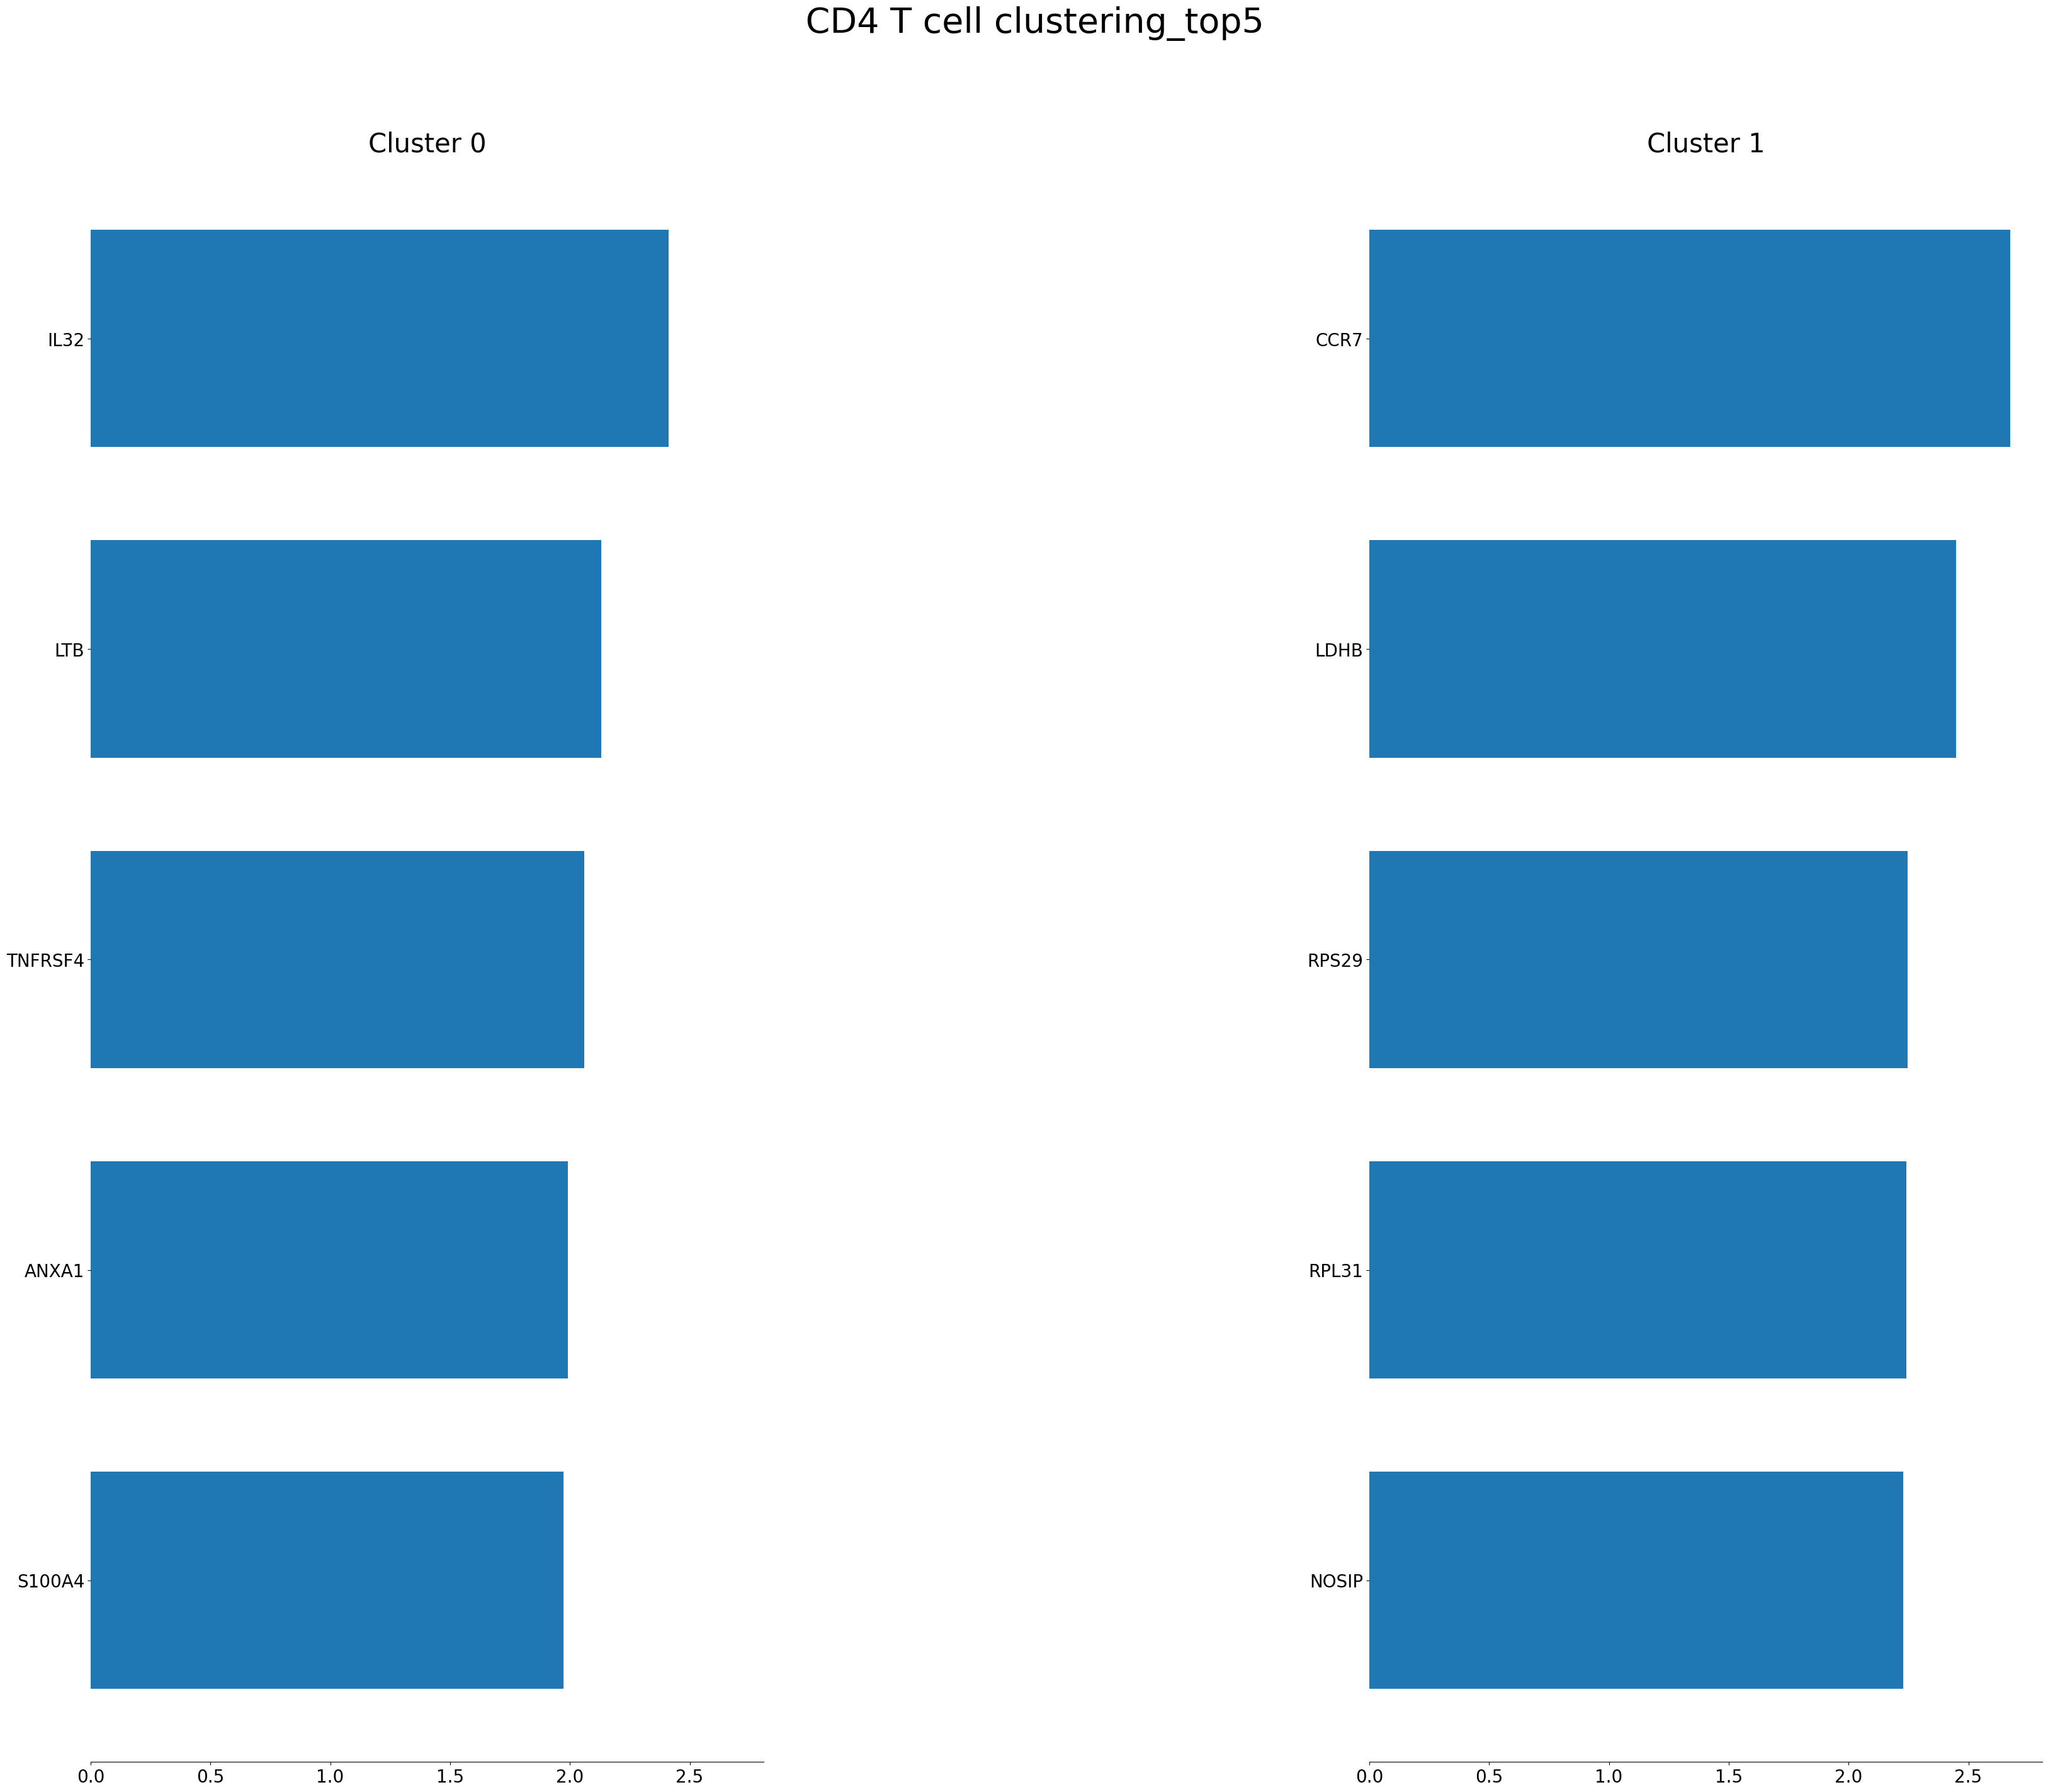

In [38]:
plot_top_genes( H, feature_names, 5, " CD4 T cell clustering_top5 ",[1,2])

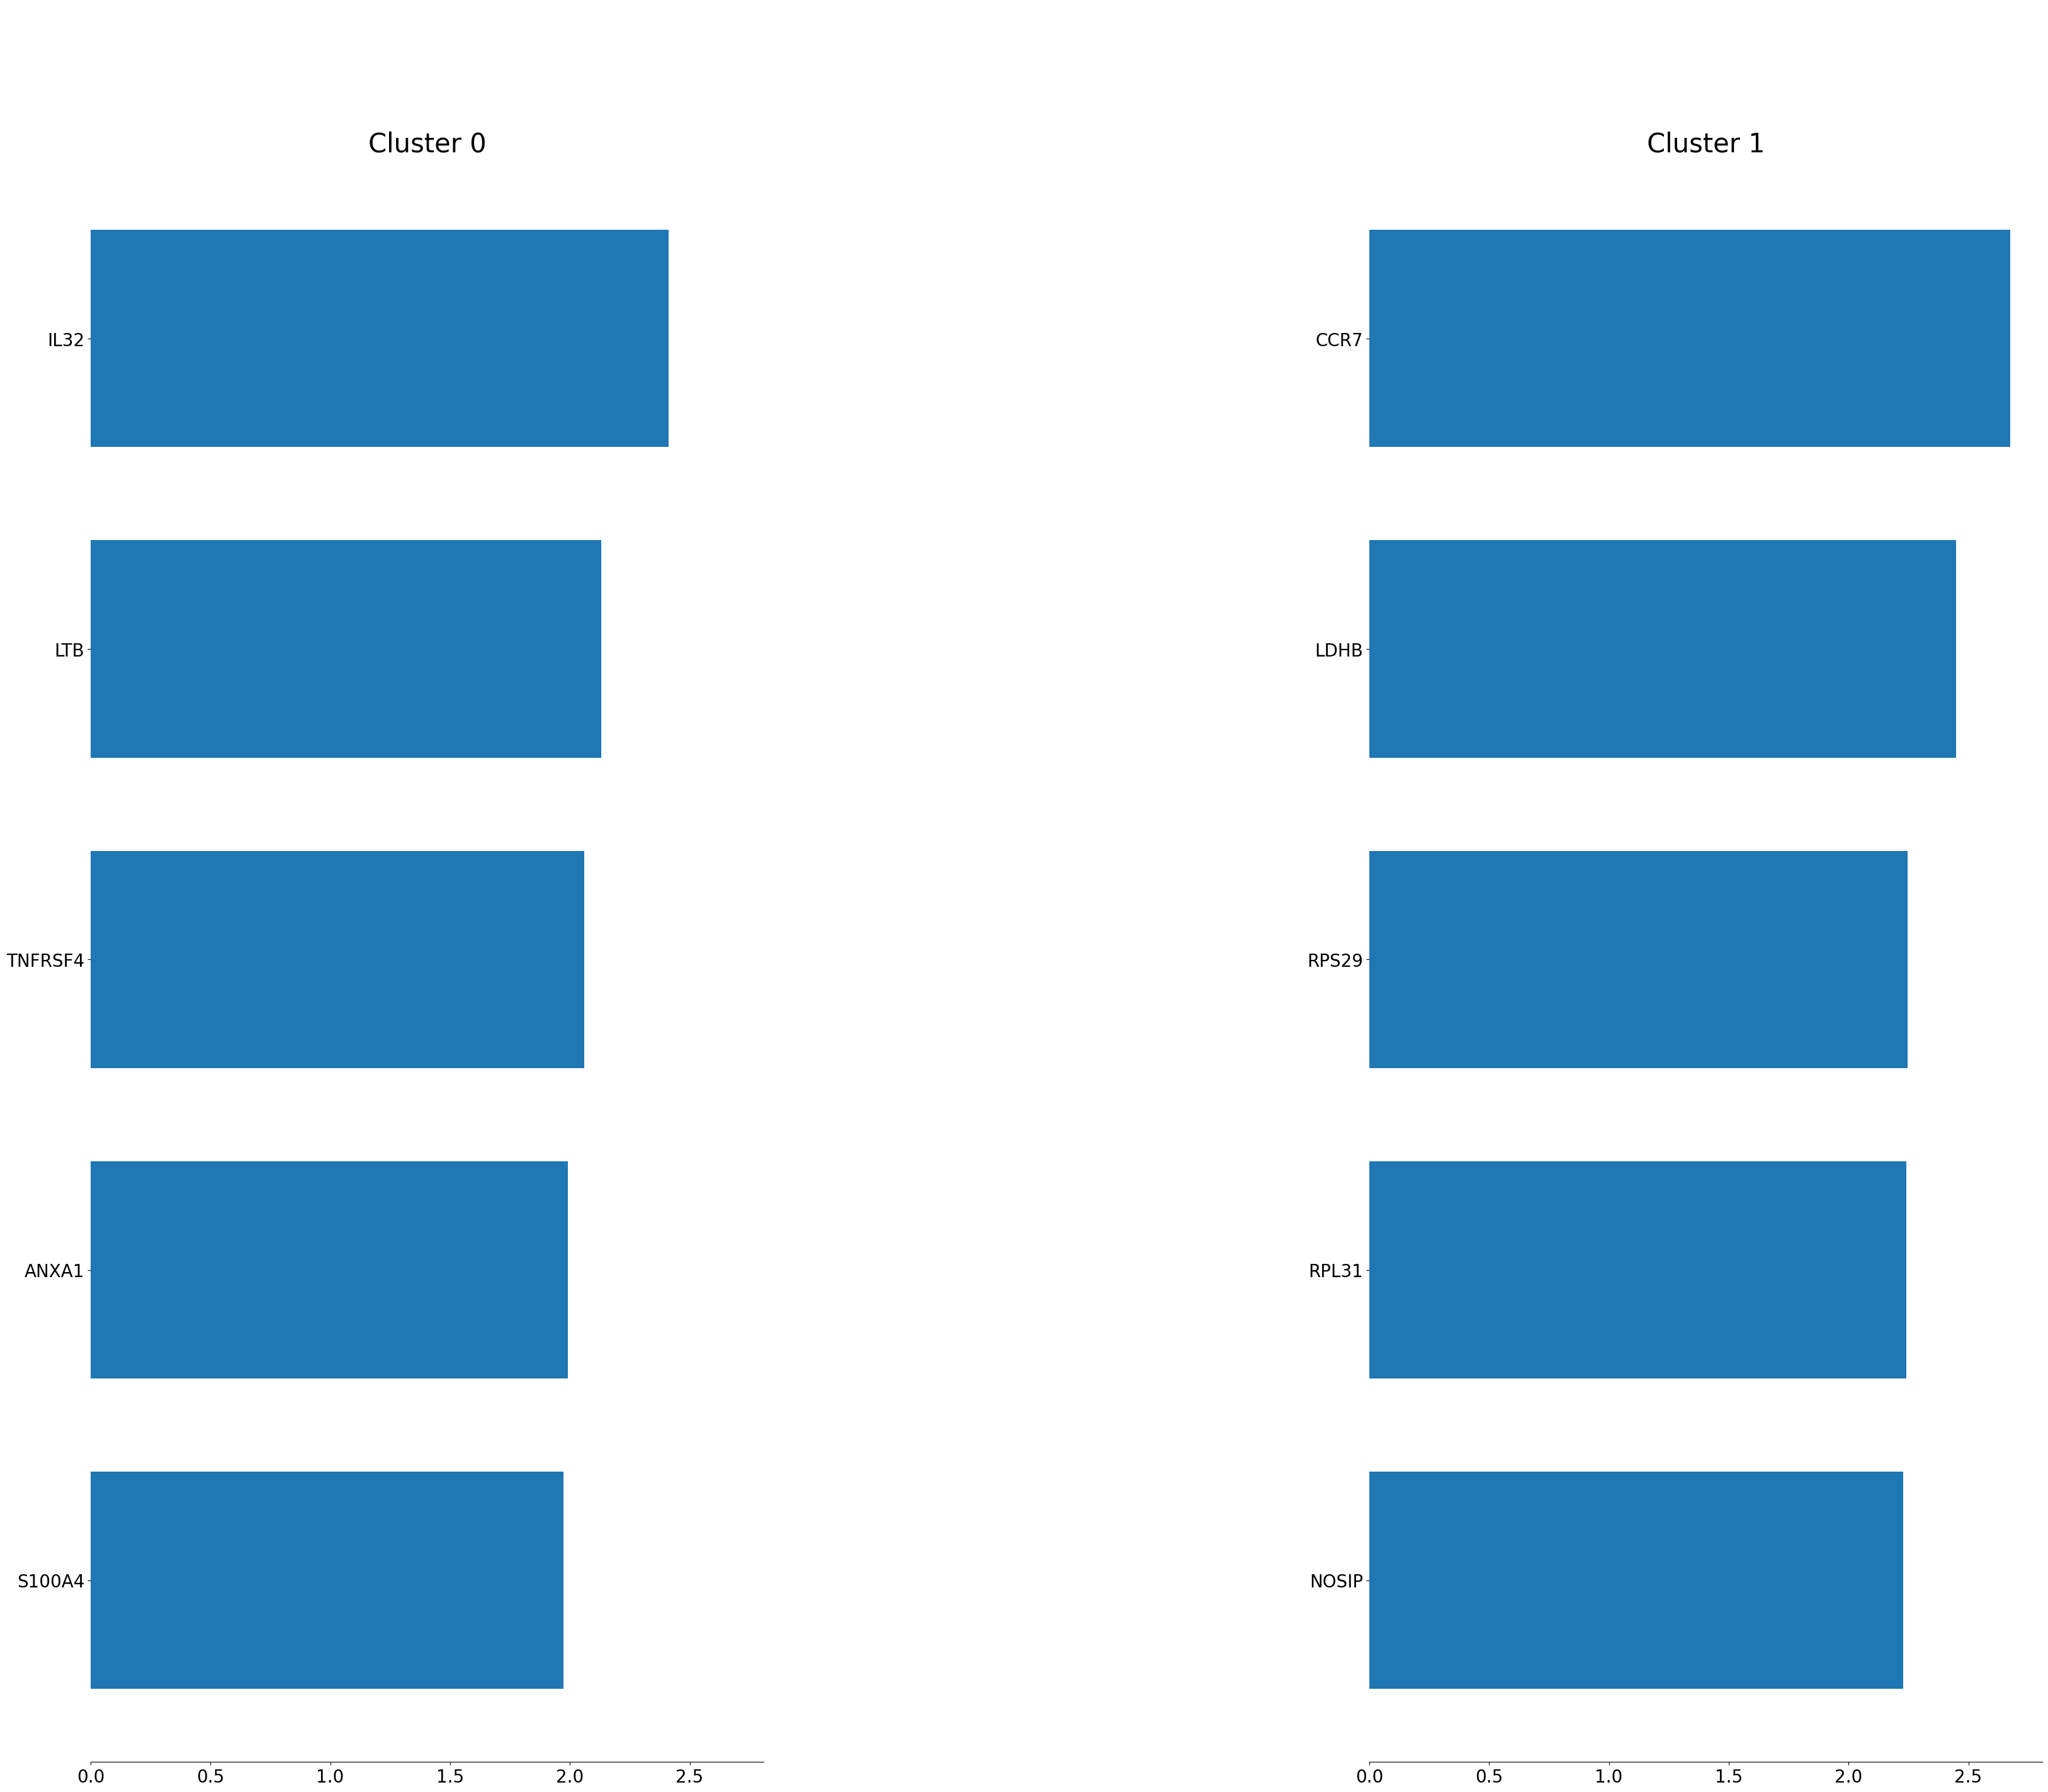

In [39]:
plot_top_genes( H, feature_names, 5, "  ",[1,2])

In [40]:
from singlecell_NMF.NMF import get_max_loading

In [41]:
NMF_labels=get_max_loading(W)

In [42]:
NMF_labels

array([0, 0, 0, ..., 1, 0, 1])

In [43]:
labels0=pd.DataFrame(NMF_labels,columns=['NMF_labels'],index=df0.index)
labels0

,NMF_labels
AAACATACAACCAC-1,0
AAACATTGATCAGC-1,0
AAACGCACTGGTAC-1,0
AAACGCTGTAGCCA-1,0
AAACTTGATCCAGA-1,1
...,...
TTGTAGCTAGCTCA-1,0
TTTAGCTGATACCG-1,1
TTTCACGAGGTTCA-1,1
TTTCCAGAGGTGAG-1,0


In [44]:
labels0.value_counts()

NMF_labels
1             688
0             495
dtype: int64

from sklearn.decomposition import PCA
reduced_data = PCA(n_components=10).fit_transform(df0.values)

import umap
umap_data = umap.UMAP(n_neighbors=10,n_components=2).fit_transform(reduced_data)

pd.DataFrame(umap_data,columns=['x','y'],index=df0.index)

In [45]:
#pd.DataFrame(umap_data,columns=['x','y'],index=df0.index).to_csv("bioinformatics_umap_well4seurat.csv")

In [46]:
#!pip uninstall -y umap

In [47]:
umap_embedding=pd.read_csv("./bioinformatics_umap_well4seurat.csv",index_col=0)
umap_embedding                           

,x,y
AAACATACAACCAC-1,6.600835,2.038866
AAACATTGATCAGC-1,2.695329,1.768189
AAACGCACTGGTAC-1,5.705618,1.637226
AAACGCTGTAGCCA-1,8.414455,4.019805
AAACTTGATCCAGA-1,4.309919,5.971140
...,...,...
TTGTAGCTAGCTCA-1,3.494887,2.034061
TTTAGCTGATACCG-1,4.960085,7.927847
TTTCACGAGGTTCA-1,6.176819,6.800618
TTTCCAGAGGTGAG-1,3.358009,3.086874


In [48]:
umap_data=umap_embedding.values

Text(0, 0.5, 'umap2')

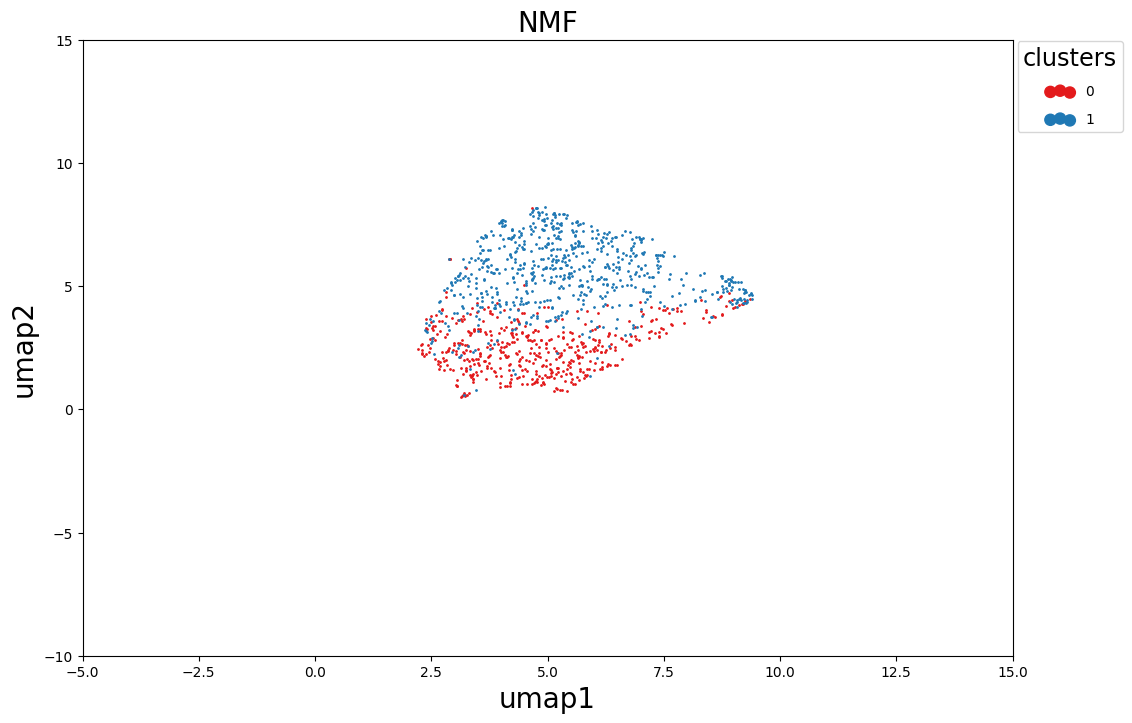

In [49]:
plt.figure(figsize=(12,8))
plt.title('NMF',fontsize=20)
#celltype2=pd.read_csv("./celltype2.csv",index_col=0)
#target_names=list(celltype2["x"].astype('category').cat.categories)
target_names=list(labels0["NMF_labels"].astype('category').cat.categories)
target=labels0["NMF_labels"].astype('category').values.codes
#colors=['#800000','#FF0000','#C71585','#FF00FF','#FFC0CB','#4B0082','#8B008B','#6A5ACD','#8B4513']#,'#FF8C00','#FF6347','#20B2AA']
colors=['#E31A1C','#1F78B4','#FF7F00','#CAB2D6','#A6CEE3','#B2DF8A','#FB9A99','#33A02C','#FDBF6F',]
for color,i,target_name in zip(colors,np.arange(2),target_names):
    plt.scatter(umap_data[target==i,0], umap_data[target==i,1],color=color, s=1,label=target_name)
#plt.legend(loc='best',scatterpoints=1,fontsize='medium')#,scatteryoffsets=1
plt.legend(loc='best',scatterpoints=3,labelspacing=1,markerscale=8,fontsize='medium',bbox_to_anchor=(1.12,1.0),borderaxespad=0.1,title='clusters',title_fontsize='xx-large')#,scatteryoffsets=1
plt.xlim(-5,15)
plt.ylim(-10,15)
plt.xlabel("umap1",fontsize=20)
plt.ylabel("umap2",fontsize=20)

Text(0, 0.5, 'umap2')

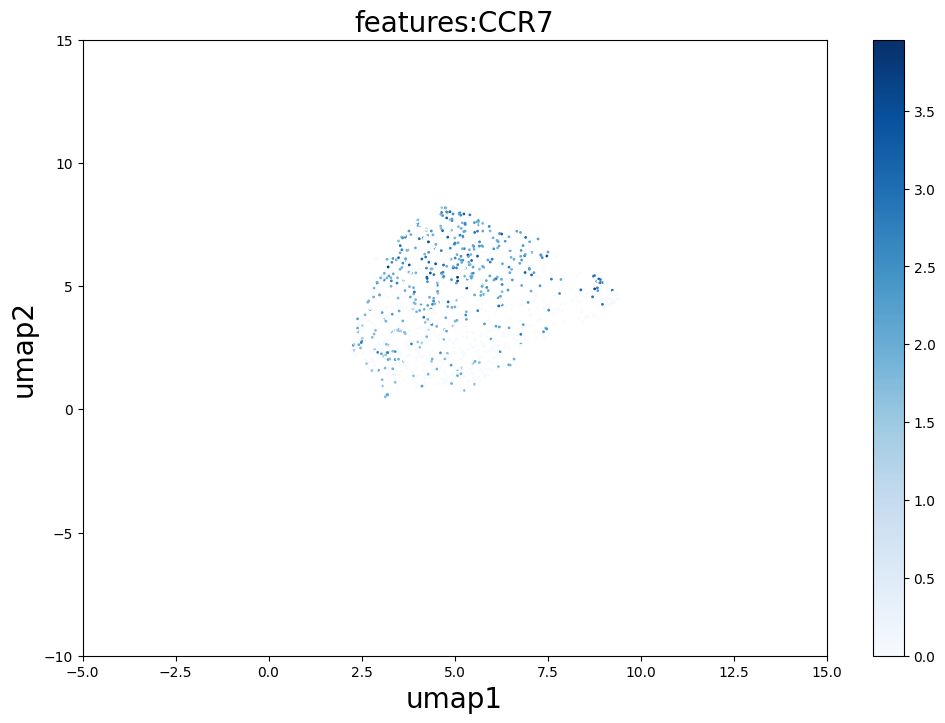

In [50]:
plt.figure(figsize=(12,8))
plt.title('features:CCR7',fontsize=20)
celltype2=pd.read_csv("./celltype2.csv",index_col=0)
#target_names=list(celltype2["x"].astype('category').cat.categories)
target_names=list(labels0["NMF_labels"].astype('category').cat.categories)
target=labels0["NMF_labels"].astype('category').values.codes
#colors=['#800000','#FF0000','#C71585','#FF00FF','#FFC0CB','#4B0082','#8B008B','#6A5ACD','#8B4513']#,'#FF8C00','#FF6347','#20B2AA']
#colors=['#E31A1C','#1F78B4','#FF7F00','#CAB2D6','#A6CEE3','#B2DF8A','#FB9A99','#33A02C','#FDBF6F',]

plt.scatter(umap_data[:,0], umap_data[:,1],c=df0["CCR7"].values, s=1,cmap='Blues',label="CCR7")#
#plt.legend(loc='best',scatterpoints=1,fontsize='medium')#,scatteryoffsets=1
#plt.legend(loc='best',scatterpoints=3,labelspacing=1,markerscale=2.5,fontsize='medium',bbox_to_anchor=(1.18,1.0),borderaxespad=0.,title='features',title_fontsize='xx-large')#,scatteryoffsets=1
plt.colorbar()
plt.xlim(-5,15)
plt.ylim(-10,15)
plt.xlabel("umap1",fontsize=20)
plt.ylabel("umap2",fontsize=20)

Text(0, 0.5, 'umap2')

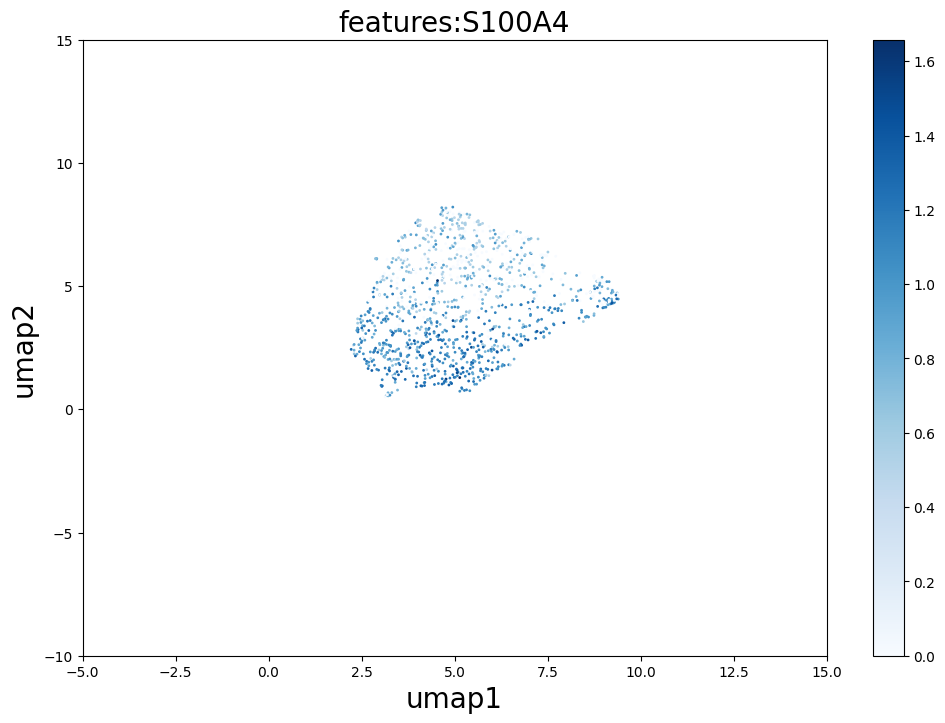

In [51]:
plt.figure(figsize=(12,8))
plt.title('features:S100A4',fontsize=20)
celltype2=pd.read_csv("./celltype2.csv",index_col=0)
#target_names=list(celltype2["x"].astype('category').cat.categories)
target_names=list(labels0["NMF_labels"].astype('category').cat.categories)
target=labels0["NMF_labels"].astype('category').values.codes
#colors=['#800000','#FF0000','#C71585','#FF00FF','#FFC0CB','#4B0082','#8B008B','#6A5ACD','#8B4513']#,'#FF8C00','#FF6347','#20B2AA']
#colors=['#E31A1C','#1F78B4','#FF7F00','#CAB2D6','#A6CEE3','#B2DF8A','#FB9A99','#33A02C','#FDBF6F',]

plt.scatter(umap_data[:,0], umap_data[:,1],c=df0["S100A4"].values, s=1,cmap='Blues',label="S100A4")#target_name
#plt.legend(loc='best',scatterpoints=1,fontsize='medium')#,scatteryoffsets=1
#plt.legend(loc='best',scatterpoints=3,labelspacing=1,markerscale=2.5,fontsize='medium',bbox_to_anchor=(1.18,1.0),borderaxespad=0.,title='features',title_fontsize='xx-large')#,scatteryoffsets=1
plt.colorbar()
plt.xlim(-5,15)
plt.ylim(-10,15)
plt.xlabel("umap1",fontsize=20)
plt.ylabel("umap2",fontsize=20)

In [52]:
#louvain聚类

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [54]:
umap_data=pd.read_csv("bioinformatics_umap_well4seurat.csv",index_col=0).values
umap_data

array([[6.6008353, 2.0388663],
       [2.6953287, 1.7681888],
       [5.7056184, 1.6372259],
       ...,
       [6.176819 , 6.800618 ],
       [3.3580093, 3.0868745],
       [4.400716 , 5.866768 ]])

In [55]:
labels0=pd.read_csv('cd4tlouvainpc10label.csv',index_col=0)
labels0

,louvain_labels
AAACATACAACCAC-1,0
AAACATTGATCAGC-1,0
AAACGCACTGGTAC-1,0
AAACGCTGTAGCCA-1,1
AAACTTGATCCAGA-1,0
...,...
TTGTAGCTAGCTCA-1,0
TTTAGCTGATACCG-1,0
TTTCACGAGGTTCA-1,0
TTTCCAGAGGTGAG-1,0


In [56]:
labels0['louvain_labels'].values

array([0, 0, 0, ..., 0, 0, 0])

In [57]:
lst=[]
for i in list(labels0['louvain_labels'].values):
    print(i)
    if i==0:
        a=1
        lst.append(a)
    else:
        b=0
        lst.append(b)
     

0
0
0
1
0
0
1
1
0
1
1
0
0
0
1
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
1
0
0
1
0
0
1
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
1
1
0
0
0
1
1
0
1
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
1
1
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
1
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
1
0
0
0
0
0
0
0
0
1
0
0
0
1
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
1
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
1
0
0
0
1
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
1
0
0
0
1
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


In [58]:
lst

[1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


In [59]:
labels=pd.DataFrame(lst,columns=['louvain_labels'],index=labels0.index)
labels

,louvain_labels
AAACATACAACCAC-1,1
AAACATTGATCAGC-1,1
AAACGCACTGGTAC-1,1
AAACGCTGTAGCCA-1,0
AAACTTGATCCAGA-1,1
...,...
TTGTAGCTAGCTCA-1,1
TTTAGCTGATACCG-1,1
TTTCACGAGGTTCA-1,1
TTTCCAGAGGTGAG-1,1


Text(0, 0.5, 'umap2')

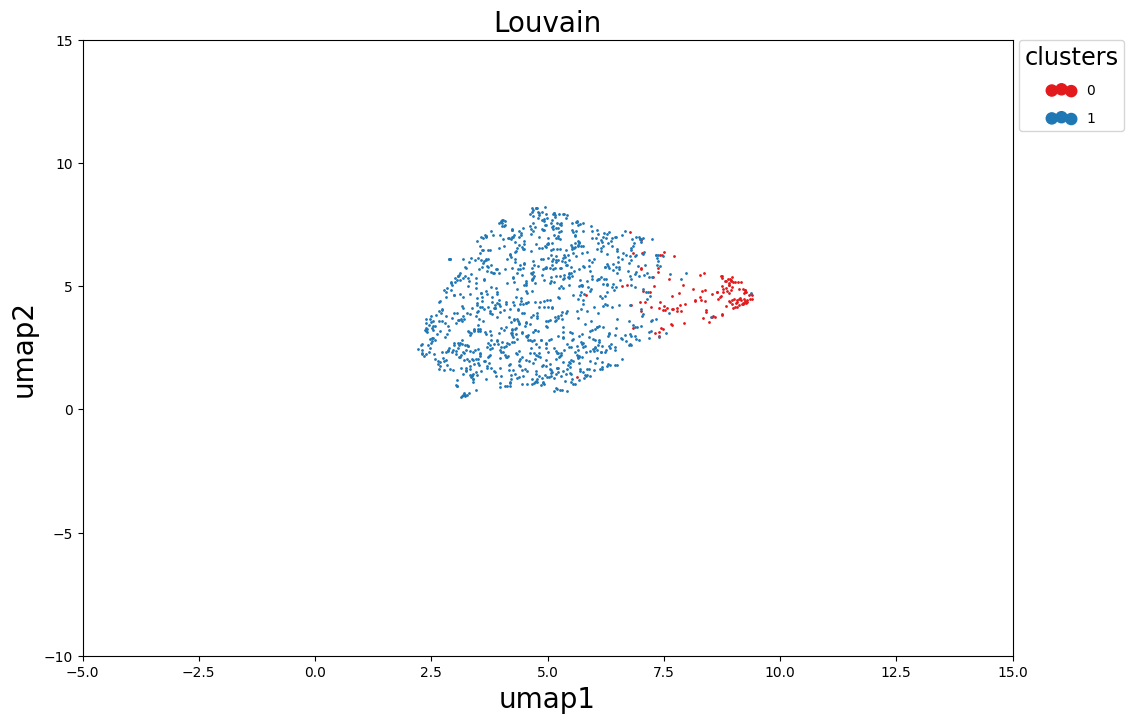

In [60]:
plt.figure(figsize=(12,8))
plt.title('Louvain',fontsize=20)
#celltype2=pd.read_csv("./celltype2.csv",index_col=0)
#target_names=list(celltype2["x"].astype('category').cat.categories)
target_names=list(labels["louvain_labels"].astype('category').cat.categories)
target=labels["louvain_labels"].astype('category').values.codes
#colors=['#800000','#FF0000','#C71585','#FF00FF','#FFC0CB','#4B0082','#8B008B','#6A5ACD','#8B4513']#,'#FF8C00','#FF6347','#20B2AA']
colors=['#E31A1C','#1F78B4','#FF7F00','#CAB2D6','#A6CEE3','#B2DF8A','#FB9A99','#33A02C','#FDBF6F',]
for color,i,target_name in zip(colors,np.arange(2),target_names):
    plt.scatter(umap_data[target==i,0], umap_data[target==i,1],color=color, s=1,label=target_name)
#plt.legend(loc='best',scatterpoints=1,fontsize='medium')#,scatteryoffsets=1
plt.legend(loc='best',scatterpoints=3,labelspacing=1,markerscale=8,fontsize='medium',bbox_to_anchor=(1.12,1.0),borderaxespad=0.,title='clusters',title_fontsize='xx-large')#,scatteryoffsets=1
plt.xlim(-5,15)
plt.ylim(-10,15)
plt.xlabel("umap1",fontsize=20)
plt.ylabel("umap2",fontsize=20)